# Step 1: Data Loading and Exploration

#### 1.Load the dataset:

In [54]:
import pandas as pd

# Load dataset
file_path = 'Mall_Customers.csv'  # Update with correct path
data = pd.read_csv(file_path)

# Inspect data
print(data.head())
print(data.info())
print(data.describe())


   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  

#### Check for missing values:

In [56]:
print(data.isnull().sum())


CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


#### Step 2: Data Preprocessing

### Precedence--> Label encoding, categorical----> One hot encoding , More categorical attributes--> Binary econding

In [59]:
# One-Hot Encoding Gender
data = pd.get_dummies(data, columns=['Genre'], prefix='Genre')

# Display the updated dataset
print(data.head())

   CustomerID  Age  Annual Income (k$)  Spending Score (1-100)  Genre_Female  \
0           1   19                  15                      39         False   
1           2   21                  15                      81         False   
2           3   20                  16                       6          True   
3           4   23                  16                      77          True   
4           5   31                  17                      40          True   

   Genre_Male  
0        True  
1        True  
2       False  
3       False  
4       False  


In [60]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
columns_to_scale = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

# Step 3: Apply Clustering Techniques

### 3.1 KMeans Clustering

C:\Users\Hello\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Hello\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Hello\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Hello\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

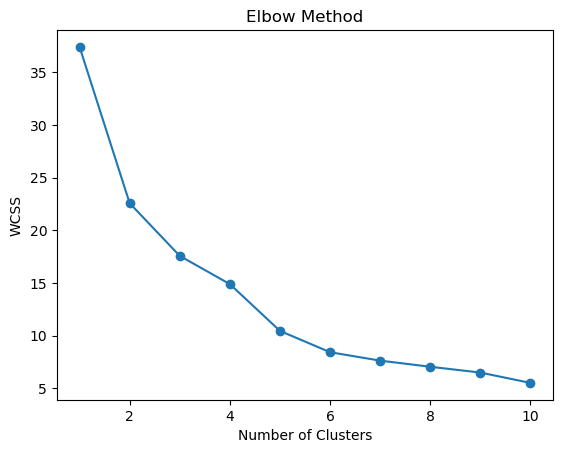

In [63]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data[columns_to_scale])
    wcss.append(kmeans.inertia_)

# Plot WCSS
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [64]:
optimal_clusters = 5  # Based on Elbow plot
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data['KMeans_Cluster'] = kmeans.fit_predict(data[columns_to_scale])


C:\Users\Hello\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


## 3.2 Hierarchical Clustering

#### Plot dendrogram to find the optimal number of clusters:

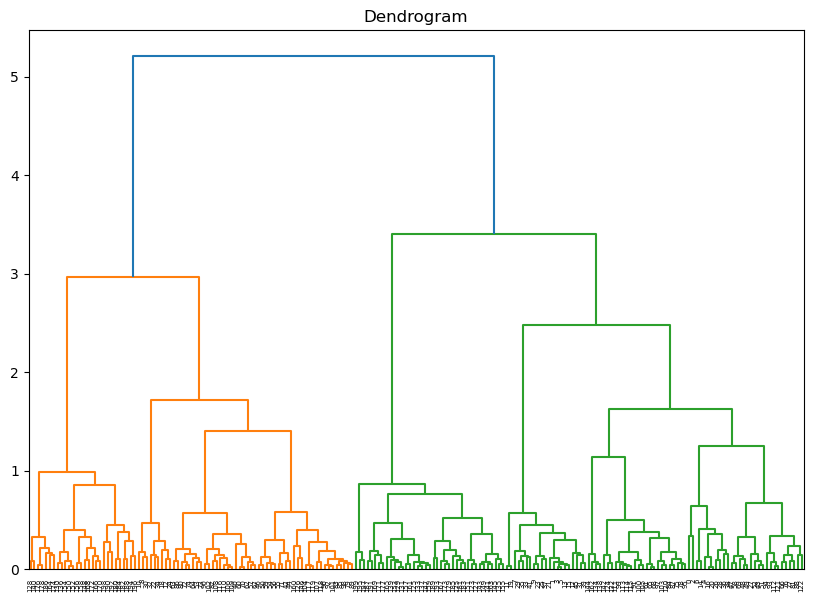

In [67]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(data[columns_to_scale], method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Dendrogram')
plt.show()


#### Apply Agglomerative Clustering:

In [69]:
from sklearn.cluster import AgglomerativeClustering

agglomerative = AgglomerativeClustering(n_clusters=optimal_clusters, linkage='ward')
data['Hierarchical_Cluster'] = agglomerative.fit_predict(data[columns_to_scale])


### 3.3 DBSCAN

In [92]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.1, min_samples=5)  # Adjust values
data['DBSCAN_Cluster'] = dbscan.fit_predict(data[columns_to_scale])


# Step 4: Cluster Evaluation

In [95]:
from sklearn.metrics import davies_bouldin_score

# Calculate DBI for KMeans
dbi_kmeans = davies_bouldin_score(data[columns_to_scale], data['KMeans_Cluster'])

# Calculate DBI for Hierarchical Clustering
dbi_hierarchical = davies_bouldin_score(data[columns_to_scale], data['Hierarchical_Cluster'])

# Filter out noise points for DBSCAN
dbscan_filtered_data = data[data['DBSCAN_Cluster'] != -1]

# Calculate DBI for DBSCAN (if enough clusters exist)
if len(dbscan_filtered_data['DBSCAN_Cluster'].unique()) > 1:  # Ensure at least 2 clusters exist
    dbi_dbscan = davies_bouldin_score(
        dbscan_filtered_data[columns_to_scale], 
        dbscan_filtered_data['DBSCAN_Cluster']
    )
    print(f"Davies-Bouldin Index (DBSCAN): {dbi_dbscan}")
else:
    print("DBSCAN did not form enough clusters to calculate the Davies-Bouldin Index.")

# Print results for KMeans and Hierarchical
print(f"Davies-Bouldin Index (KMeans): {dbi_kmeans}")
print(f"Davies-Bouldin Index (Hierarchical): {dbi_hierarchical}")


Davies-Bouldin Index (DBSCAN): 0.7036672534033965
Davies-Bouldin Index (KMeans): 0.9387275275763756
Davies-Bouldin Index (Hierarchical): 0.8746143334035464


In [103]:
import numpy as np
from scipy.spatial.distance import cdist

def calculate_dunn_index(data, labels):
    unique_clusters = np.unique(labels)
    if len(unique_clusters) < 2:  # Need at least 2 clusters
        return None
    
    # Separate points by cluster
    clusters = [data[labels == cluster] for cluster in unique_clusters]
    
    # Calculate inter-cluster distances (minimum distance between clusters)
    inter_cluster_distances = np.min(
        [cdist(cluster_i, cluster_j).min() for i, cluster_i in enumerate(clusters) 
         for cluster_j in clusters[i + 1:]]
    )
    
    # Calculate intra-cluster distances (maximum distance within a cluster)
    intra_cluster_distances = np.max(
        [cdist(cluster, cluster).max() for cluster in clusters]
    )
    
    # Dunn Index
    dunn_index = inter_cluster_distances / intra_cluster_distances
    return dunn_index

# Prepare data and labels
X = data[columns_to_scale].values  # Scaled data

# Calculate Dunn Index for KMeans
kmeans_labels = data['KMeans_Cluster'].values
dunn_kmeans = calculate_dunn_index(X, kmeans_labels)

# Calculate Dunn Index for Hierarchical Clustering
hierarchical_labels = data['Hierarchical_Cluster'].values
dunn_hierarchical = calculate_dunn_index(X, hierarchical_labels)

# Calculate Dunn Index for DBSCAN (exclude noise points)
dbscan_labels = data['DBSCAN_Cluster'].values
dbscan_filtered = X[dbscan_labels != -1]  # Exclude noise points
dbscan_labels_filtered = dbscan_labels[dbscan_labels != -1]
if len(np.unique(dbscan_labels_filtered)) > 1:
    dunn_dbscan = calculate_dunn_index(dbscan_filtered, dbscan_labels_filtered)
else:
    dunn_dbscan = None

# Print Results
print(f"Dunn Index (KMeans): {dunn_kmeans}")
print(f"Dunn Index (Hierarchical): {dunn_hierarchical}")
if dunn_dbscan is not None:
    print(f"Dunn Index (DBSCAN): {dunn_dbscan}")
else:
    print("DBSCAN did not form enough clusters to calculate the Dunn Index.")


Dunn Index (KMeans): 0.07008031556959904
Dunn Index (Hierarchical): 0.10950482350056291
Dunn Index (DBSCAN): 0.1968691722359665


# Step 5: Visualization

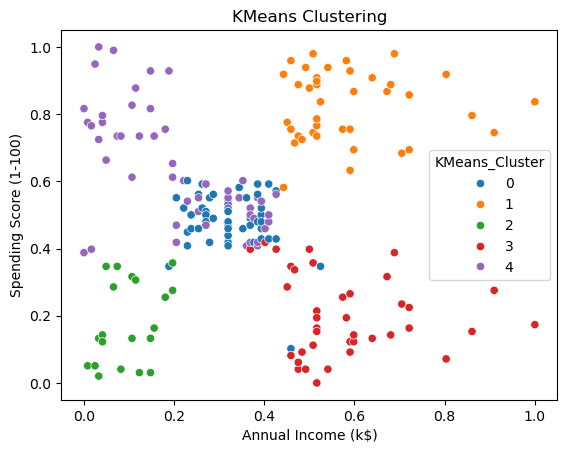

In [97]:
import seaborn as sns

sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)',
                hue='KMeans_Cluster', palette='tab10')
plt.title('KMeans Clustering')
plt.show()


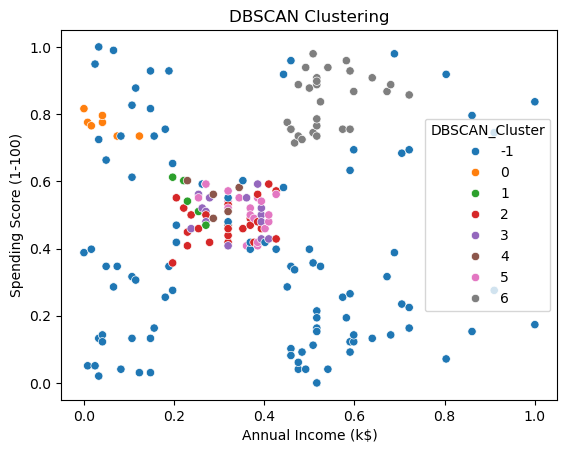

In [99]:
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)',
                hue='DBSCAN_Cluster', palette='tab10')
plt.title('DBSCAN Clustering')
plt.show()


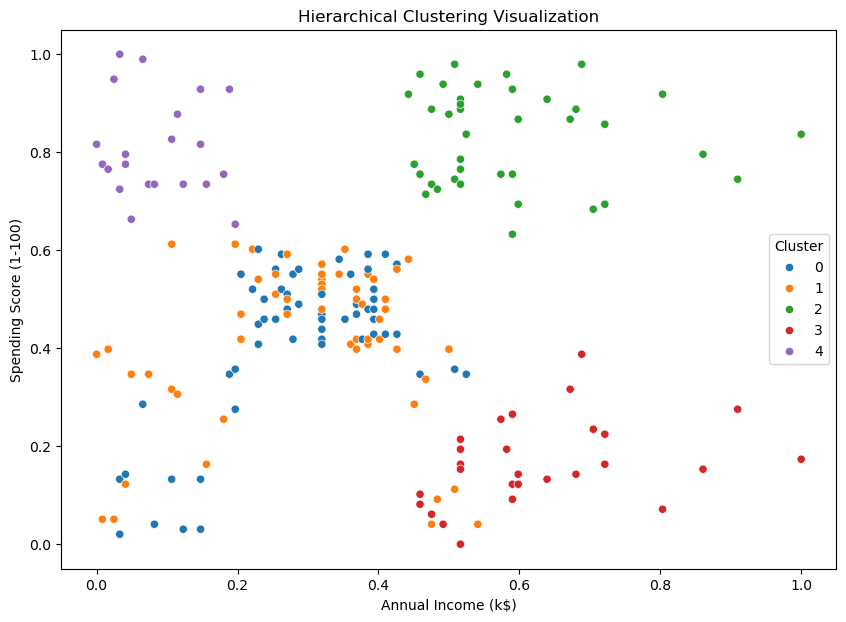

In [101]:
import seaborn as sns

# Add hierarchical cluster labels to the data (if not already done)
from sklearn.cluster import AgglomerativeClustering

optimal_clusters = 5  # Choose based on dendrogram analysis
hierarchical = AgglomerativeClustering(n_clusters=optimal_clusters, linkage='ward')
data['Hierarchical_Cluster'] = hierarchical.fit_predict(data[columns_to_scale])

# Scatter plot for visualization
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=data, 
    x='Annual Income (k$)', 
    y='Spending Score (1-100)', 
    hue='Hierarchical_Cluster', 
    palette='tab10'
)
plt.title('Hierarchical Clustering Visualization')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()
